In [30]:
#calcuration libraries
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Experimental facilities

In [31]:
#pipe diameter[m]
d_i = 12 * 10**(-3)
d_o = 15 * 10**(-3)
#pipe area[m**2]
A = (np.pi * d_i**2) / 4
#heated length[m]
l_heated = 2
#distance of pressure mesurement[m]
dz = 1

### material properties for Shell Heat Transfer Oil S2

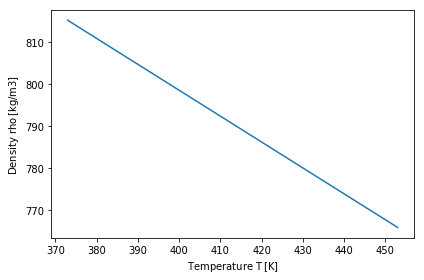

In [32]:
T_b0 = np.linspace(373,453,)
rho_b0 = 1045 - 0.616 * T_b0
plt.plot(T_b0, rho_b0)
plt.xlabel(r'Temperature T$\,\mathrm{[K]}$')
plt.ylabel(r'Density rho$\,\mathrm{[kg/m3]}$')
plt.tight_layout()
OutPutFig = 'fig/density_rho.pdf'
plt.savefig(OutPutFig)

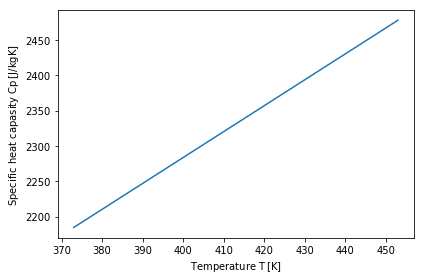

In [41]:
#specific heat capasity [J / kg K]
Cp_b0 = 818 + 3664 * 10**(-3) * T_b0
plt.plot(T_b0, Cp_b0)
plt.xlabel(r'Temperature T$\,\mathrm{[K]}$')
plt.ylabel(r'Specific heat capasity Cp$\,\mathrm{[ J / kg K]}$')
plt.tight_layout()
OutPutFig = 'fig/heat_capacity.pdf'
plt.savefig(OutPutFig)

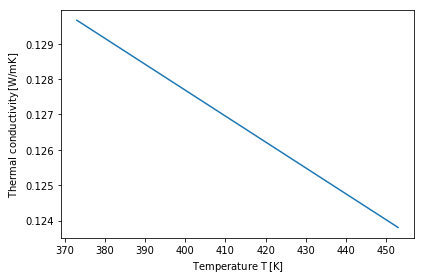

In [34]:
#thermal conductivity [W / m K]
lamda_f = 0.157 - 7.328*10**(-5) * T_b0
plt.plot(T_b0, lamda_f)
plt.xlabel(r'Temperature T$\,\mathrm{[K]}$')
plt.ylabel(r'Thermal conductivity$\,\mathrm{[W / m K]}$')
plt.tight_layout()
OutPutFig = 'fig/thermal_conductivity.pdf'
plt.savefig(OutPutFig)

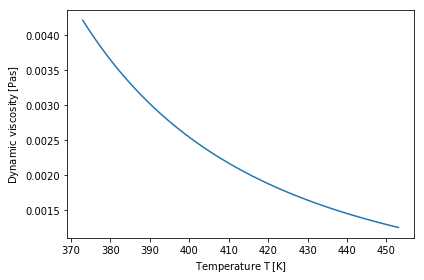

In [35]:
#dynamic viscocity [Pa s]
mu = 5.894*10**(-5) * np.exp(857.4 / (T_b0 - 172.2))
plt.plot(T_b0, mu)
plt.xlabel(r'Temperature T$\,\mathrm{[K]}$')
plt.ylabel(r'Dynamic viscosity$\,\mathrm{[Pa s]}$')
plt.tight_layout()
OutPutFig = 'fig/dynamic_viscosity.pdf'
plt.savefig(OutPutFig)

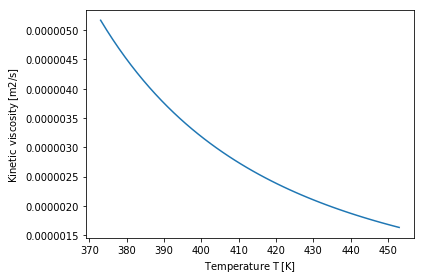

In [40]:
#kinetic viscosity [m**(2) / s]
nu = mu / rho_b0
plt.plot(T_b0, nu)
plt.xlabel(r'Temperature T$\,\mathrm{[K]}$')
plt.ylabel(r'Kinetic viscosity$\,\mathrm{[m2 / s]}$')
plt.tight_layout()
OutPutFig = 'fig/kinetic_viscosity.pdf'
plt.savefig(OutPutFig)

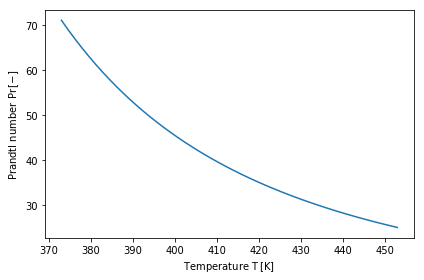

In [37]:
#Prandtl number wall
Pr_w = (Cp_b0 * mu) / lamda_f
plt.plot(T_b0, Pr_w)
plt.xlabel(r'Temperature T$\,\mathrm{[K]}$')
plt.ylabel(r'Prandtl number Pr$\,\mathrm{[-]}$')
plt.tight_layout()
OutPutFig = 'fig/prandtl_number.pdf'
plt.savefig(OutPutFig)